In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')



```
# This is formatted as code
```

pip install --upgrade plotly

In [2]:
daily_df = pd.read_csv('/content/worldometer_coronavirus_daily_data.csv')
summary_df = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')

In [3]:
summary_df.sample(5)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
169,Samoa,Australia/Oceania,3,NaN,3,0,NaN,15,NaN,NaN,NaN,199607
155,Poland,Europe,2870595,73557.0,2634711,162327,805.0,75924,1945.0,15765052.0,416965.0,37809020
52,Curacao,North America,12271,122.0,12104,45,12.0,74505,741.0,108037.0,655958.0,164701
182,Somalia,Africa,14647,768.0,6717,7162,NaN,899,47.0,129762.0,7965.0,16291776
193,Switzerland,Europe,693023,10801.0,645322,36900,134.0,79549,1240.0,7630534.0,875876.0,8711891


**strptime function**
1. %d - Represents the day of the month. Example: 01, 02, ..., 31
2. %B - Month's name in full. Example: January, February etc.
3. %Y - Year in four digits. Example: 2018, 2019 etc.
4. %m - month in number. Example: 02, etc.

Here is the link to find more arguments under this fucntions[ https://www.programiz.com/python-programming/datetime/strptime](https://)



In [4]:
daily_df['date'] = daily_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
daily_df['date']
# we can also convert using this
#daily_df['date'] = pd.to_datetime(daily_df['date'])

0        2020-02-15
1        2020-02-16
2        2020-02-17
3        2020-02-18
4        2020-02-19
            ...    
103199   2021-05-24
103200   2021-05-25
103201   2021-05-26
103202   2021-05-27
103203   2021-05-28
Name: date, Length: 103204, dtype: datetime64[ns]

In [5]:
daily_df.dtypes

date                       datetime64[ns]
country                            object
cumulative_total_cases            float64
daily_new_cases                   float64
active_cases                      float64
cumulative_total_deaths           float64
daily_new_deaths                  float64
dtype: object

##**1. GLOBAL STATISTICS**

In [6]:
summary_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807
1,Albania,Europe,132285,2448.0,129097,740,18.0,46013,851.0,710160.0,247017.0,2874947
2,Algeria,Africa,128198,3455.0,89232,35511,26.0,2877,78.0,230861.0,5180.0,44565141
3,Andorra,Europe,13693,127.0,13416,150,12.0,176965,1641.0,193595.0,2501971.0,77377
4,Angola,Africa,33944,749.0,27577,5618,19.0,1005,22.0,569993.0,16872.0,33784208


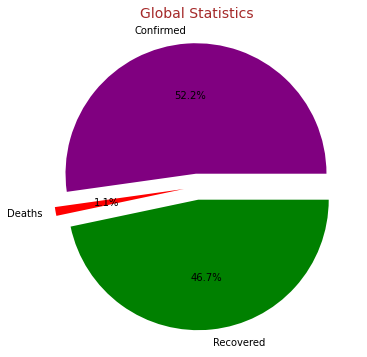

In [7]:
# based on confirmed, deaths and recovered we will create Global Statitics 
# using matplotplib
plt.figure(figsize = (12,6))
plt.title("Global Statistics", color = 'Brown', size = 14)
myexplode = [0.1,0.1,0.1] # this will seperate every part
mycolor = ['Purple', 'Red', 'Green']
plt.pie([summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()],
        labels = ['Confirmed', 'Deaths', 'Recovered'], autopct = '%1.1f%%', explode = myexplode, colors = mycolor);

In [8]:
# using plotly
graph = px.pie(names =['Confirmed', 'Deaths', 'Recovered'],
       values = [summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()],
       title = '<b> Global Statistics </b>',hover_name = ['Confirmed', 'Deaths', 'Recovered'], 
       hole = 0.6, color = mycolor,
       height = 500,
       width = 700)
graph.update_layout(
    font_family="Times New Roman",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red")


In [9]:
# using plotly to plot two graphs 
graph = px.pie(names =['Confirmed', 'Deaths', 'Recovered'],
       values = [summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()],
       title = '<b> Global Statistics </b>',hover_name = ['Confirmed', 'Deaths', 'Recovered'], 
       hole = 0.6, color = mycolor,
       height = 500,
       width = 700)
graph.update_layout(
    updatemenus =[
                   dict(
                       type = "buttons",
                        direction = "right",
                        buttons = list([
                            dict(
                            args = ["type", "pie"],
                            label = "Pie Plot",
                            method = "restyle"
                        ),
                        dict(
                            args = ["type", "bar"],
                            label = "Bar",
                            method = "restyle"
                        )
                        ]),
                   ),
    ]
)
graph.update_traces(textinfo = "label+text+value")
graph.show()

In [10]:
def add_comma(num):
  out =""
  counter = 0
  for i in num[::-1]: #54321
    counter = counter + 1
    if counter == 4:
      counter = 1
      out = ',' + out
    out = i + out
  return out

In [11]:
add_comma(str(12312345))

'12,312,345'

map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

In [12]:
log_scale_vals = list(range(0,25,2))
scale_vals = (np.exp2(log_scale_vals)).astype(int).astype(str)
scale_vals = list(map(add_comma, scale_vals))

In [13]:
scale_vals

['1',
 '4',
 '16',
 '64',
 '256',
 '1,024',
 '4,096',
 '16,384',
 '65,536',
 '262,144',
 '1,048,576',
 '4,194,304',
 '16,777,216']

##2. Geo Graphs based on Highest total confirmed Cases

In [14]:
summary_df['log(Total Confirmed)'] = np.log2(summary_df['total_confirmed'])
summary_df['Total Confirmed'] = summary_df['total_confirmed'].apply(lambda x : add_comma(str(x)))

graph = px.choropleth(summary_df,
                    locations="country",
                    color="log(Total Confirmed)",
                    locationmode = 'country names',
                    hover_name='country',
                    hover_data=['Total Confirmed'],
                    color_continuous_scale='reds',
                    title = '<b>Covid19 Confirmed Cases Around The Globe</b>')
graph.update_layout(title_font_size=22,
                  margin={"r":20, "l":30},
                  coloraxis={#"showscale":False,
                            "colorbar":dict(title="<b>Confirmed Cases</b><br>",
                                            #range=[np.log(50), np.log(6400)],
                                            titleside="top",
                                            tickmode="array",
                                            tickvals=log_scale_vals,
                                            ticktext=scale_vals
                                        )},
                 )
graph.show()

In [15]:
# simple way to represent
graph = px.choropleth(summary_df,
                    locations="country",
                    color="total_confirmed",
                    locationmode = 'country names',
                    hover_name='country',
                    hover_data=['Total Confirmed'],
                    title = '<b>Covid19 Confirmed Cases Around The Globe</b>')
graph.update_layout(title_font_size=16,
                  margin={"r":20, "l":30},
                  coloraxis={#"showscale":False,
                            "colorbar":dict(title="<b>Confirmed Cases</b><br>")}
                      )
graph.show()

##3. POPULATION AROUND GLOBE IN 2020

In [16]:
pop_df = pd.read_csv('/content/population_by_country_2020.csv')

In [17]:
pop_df = pop_df.drop(columns = pop_df.loc[:,'Yearly Change':] ,axis = 1)

In [18]:
pop_df.columns = ['country', 'population']

In [19]:
graph = px.choropleth(pop_df,
                    locations="country",
                    color="population",
                    locationmode = 'country names',
                    title = '<b>population in 2020 around globe</b>')
graph.show()

##4. Total Coronavirus Confirmed Cases Breakdown by Continent and its Country
Tree Map 

In [20]:
summary_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed
0,Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807,16.097353,"70,111"
1,Albania,Europe,132285,2448.0,129097,740,18.0,46013,851.0,710160.0,247017.0,2874947,17.013290,"132,285"
2,Algeria,Africa,128198,3455.0,89232,35511,26.0,2877,78.0,230861.0,5180.0,44565141,16.968014,"128,198"
3,Andorra,Europe,13693,127.0,13416,150,12.0,176965,1641.0,193595.0,2501971.0,77377,13.741151,"13,693"
4,Angola,Africa,33944,749.0,27577,5618,19.0,1005,22.0,569993.0,16872.0,33784208,15.050869,"33,944"


In [21]:
pip install --upgrade plotly

In [22]:
fig = px.treemap(summary_df, path =['continent','country'], values="total_confirmed", height = 750,
                 title="<b>Total Confirmed Cases Breakdown by Country</b>")
fig.update_traces(textinfo = "label+text+value")
fig.show()

As we can see that Asia has the highest number of confirmed cases

## 5. Visualise using Country

In [23]:
daily_df[daily_df['country']== 'India'].head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
43641,2020-02-15,India,3.0,NaN,0.0,0.0,NaN
43642,2020-02-16,India,3.0,0.0,0.0,0.0,NaN
43643,2020-02-17,India,3.0,0.0,0.0,0.0,NaN
43644,2020-02-18,India,3.0,0.0,0.0,0.0,NaN
43645,2020-02-19,India,3.0,0.0,0.0,0.0,NaN


In [24]:
def plot_country(country):
  #plot 1 (For Cumulative Total Cases)
  graph = px.area(daily_df, x = daily_df[daily_df['country'] == country]['date'],
          y = daily_df[daily_df['country'] == country]['cumulative_total_cases'],
          template='plotly_dark',
          title = f"total cumulative cases in {country}" )
  graph.update_layout(
    title=f"total cumulative cases in {country}",
    xaxis_title="Date Range",
    yaxis_title="total Count of Cases")
  graph.show()
  #plot 2 (Daily New Deaths)
  graph = px.bar(daily_df, x = daily_df[daily_df['country'] == country]['date'],
                  y =daily_df[daily_df['country'] == country]['daily_new_deaths'],
                  template ='plotly_dark',
                  title = f"daily new deaths in {country}" )
  #graph.update_traces(line={'width':2, 'color': 'Red'})
  graph.update_layout(
    xaxis_title="Date Range",
    yaxis_title="total Count of Deaths")
  graph.show()


In [25]:
# Now we can analyze using plot_country function
plot_country('India')

## 6. Visualize Using Continent

In [26]:
summary_df.head(1)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),Total Confirmed
0,Afghanistan,Asia,70111,2899.0,57119,10093,1124.0,1765,73.0,462860.0,11654.0,39717807,16.097353,"70,111"


In [27]:
def plot_continent(continent):
  df_continent = summary_df[summary_df['continent'] == continent]
  # plot 1 (TOTAL CONFIRMED CASES)
  graph = px.bar(df_continent, x =df_continent['country'], y =df_continent['total_confirmed'],
                  title = f"<b>Total Confirmed Cases in the {continent} Country wise",
                  template = 'plotly_dark',
                  height = 600, width = 1300)
  graph.update_traces(text = df_continent['total_confirmed'])# for labeling value 
  graph.update_layout(title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of total Confirmed cases',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14,)
 
  graph.show()
  #=========================================================================================
  # plot 2 (Total Death Cases)
  graph = px.area(df_continent, x =df_continent['country'], y =df_continent['total_deaths'],
                  title = f"<b>Total Death Cases in the {continent} Country wise",
                  template = 'plotly_dark',
                  height = 600, width = 1300)
  graph.update_traces(text = df_continent['total_deaths'])# for labeling value 
  graph.update_layout(title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of total Death cases',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14)
  graph.show()
  #=========================================================================================
  # plot 3 (Total Recovered Cases)
  graph = go.Figure() 
  graph.add_trace(go.Line(name ='Recovered', x =df_continent['country'], y =df_continent['total_recovered']))
  graph.add_trace(go.Scatter(name ='Serious or critical', x =df_continent['country'], y =df_continent['serious_or_critical']))
  graph.update_traces(text = df_continent['total_recovered'])
  graph.update_layout(title = f"<b>Total Recovered Cases in the {continent} Country wise",
                      title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of Recovered cases',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14,
                      height= 600,
                      width = 1300,
                      template = 'plotly_dark')
  graph.show()
  #=========================================================================================
  # plot 4 (Total Tests and Toal Population)
  graph = px.area(df_continent, x =df_continent['country'], y =df_continent['total_tests'],
                  title = f"<b>Total Tests and Toal Population in {continent} Country wise",
                  template = 'plotly_dark',
                  height = 600, width = 1300,
                  color=px.Constant("Total Tests"))
  graph.add_scatter(x=df_continent['country'], y = df_continent['population'], name = 'Population')
  graph.update_layout(title_font_size=16,
                      title_font_color = 'red',
                      xaxis_title = 'Countries', 
                      xaxis_title_font_color = 'blue',
                      xaxis_title_font_size=14,
                      yaxis_title = 'Count of Population and Tests',
                      yaxis_title_font_color = 'blue',
                      yaxis_title_font_size=14,
                      legend_title_text ='Category')
 
  graph.show();

In [28]:
# Now we can analyze using plot_countinent function
plot_continent('Asia')

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [29]:
plot_continent('Europe')

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## DASHBOARD

In [51]:
from plotly.subplots import make_subplots
mycolor = ['orange', 'red', 'lime']
graph = make_subplots(rows=2, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "scatter" , "colspan" : 2}, None]])
graph.add_trace(
    go.Pie(labels = ['Confirmed', 'Deaths', 'Recovered'], 
           values =[summary_df['total_confirmed'].sum(), summary_df['total_deaths'].sum(), summary_df['total_recovered'].sum()], name = "Total Recovered",
          hole = 0.5, pull = [0,0.6,0]), 
           row =1, col =1)
graph.update_traces(textinfo = 'label+value')
graph.add_trace(
    go.Bar(x = daily_df[daily_df['country'] == 'India']['date'],
                  y =daily_df[daily_df['country'] == 'India']['daily_new_deaths'], name = 'Daily New Deaths'),
           #hole = 0.3, pull = [0,0.6,0]), 
           row =1, col =2)
graph.add_trace(
    go.Scatter(x = summary_df[summary_df['continent'] == 'Asia']['country'],
                  y =summary_df[summary_df['continent'] == 'Asia']['total_deaths'],name = 'Total Deaths'),
           #hole = 0.3, pull = [0,0.6,0]), 
           row =2, col =1)
graph.update_layout(template = 'plotly_dark',
                    legend_title_text ='Categories',
                    title = f"<b>Analyis Of COVID-19")
graph.show()